In [1]:
%pip install --quiet jupysql ipywidgets ipympl duckdb duckdb-engine pandas matplotlib jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [2]:
import duckdb
import pandas as pd
import ipywidgets as widgets
%load_ext sql
%matplotlib widget

In [3]:
%config SqlMagic.autopandas = True
%config SqlMagic.displaycon = False

In [4]:
%sql duckdb:///./380272.duckdb

Connecting to 'duckdb:///./380272.duckdb'

In [5]:
%sqlcmd tables

Name
Gateway
Site
Node
Message
Trace
Radio
Power_Consumption
Downlink_Event_Error_Message
Join_Message
Content_Message


In [7]:
%sql nodes =<< select distinct * from Node

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board
0,70B3D57ED005E88A,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1
1,70B3D57ED005EA56,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1
2,70B3D57ED005EA55,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1
3,70B3D57ED005EA57,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1
4,70B3D57ED005EA59,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1


In [14]:

timestamps=%sql select timestamp from Power_Consumption 
timestamps = timestamps["timestamp"].map(lambda x: x.isoformat())

<Axes: xlabel='timestamp'>

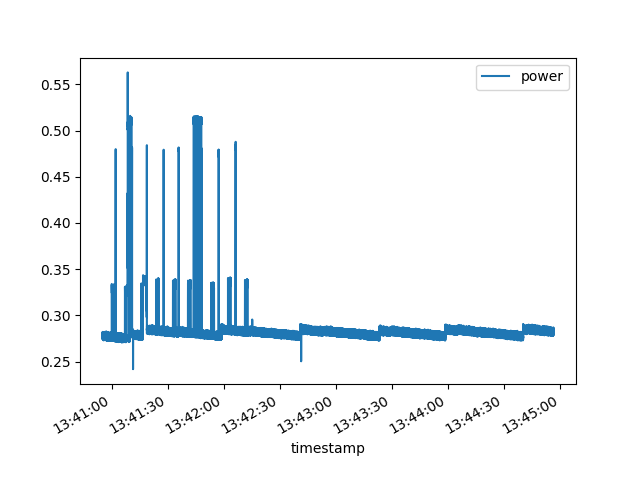

In [26]:
deveui = "70B3D57ED005EA56"
power= %sql select timestamp,power from Power_Consumption where node_id LIKE '{{deveui}}'
#plot voltages with timestamps as x axis. timestamps need to show milliseconds
power.plot(x="timestamp", y="power")

In [16]:
voltages.plot()

AttributeError: 'NoneType' object has no attribute 'plot'

In [12]:
lower=widgets.SelectionSlider(options=timestamps, value=timestamps.min())
upper=widgets.SelectionSlider(options=timestamps, value=timestamps.max())
%sql --save hej --interact deveuis --interact lower --interact upper SELECT * from Power_Consumption where node_id LIKE '{{deveuis}}' AND timestamp BETWEEN '{{lower}}' AND '{{upper}}'

Interactive mode, please interact with below widget(s) to control the variable

interactive(children=(Text(value='70B3D57ED005EA55', description='deveuis'), SelectionSlider(description='lowe…